In [1]:
import pandas as pd
import keras
from keras import models
from keras.layers import Embedding, Dense, Flatten
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sklearn
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline 


Using TensorFlow backend.


# Read Data

In [2]:
cwd = os.getcwd()
path = '/deepEmbeddings/Data/'
data_df = pd.read_csv(path+'bike_sharing_daily.csv', encoding='latin')

In [3]:
data_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
data_df['Date_dt'] = pd.to_datetime(data_df['dteday'])
data_small_df = data_df[['Date_dt','cnt','mnth']]
# data_small_df['Day'] = data_small_df['Date_dt'].dt.dayofweek
data_small_df.head() 

# data_small_df = data_small_df.sort_values(by=['Day'])

,Date_dt,cnt,mnth
0,2011-01-01,985,1
1,2011-01-02,801,1
2,2011-01-03,1349,1
3,2011-01-04,1562,1
4,2011-01-05,1600,1


In [5]:
data_small_df = data_small_df.sort_values(by=['mnth','Date_dt'])
data_small_df.head()

,Date_dt,cnt,mnth
0,2011-01-01,985,1
1,2011-01-02,801,1
2,2011-01-03,1349,1
3,2011-01-04,1562,1
4,2011-01-05,1600,1


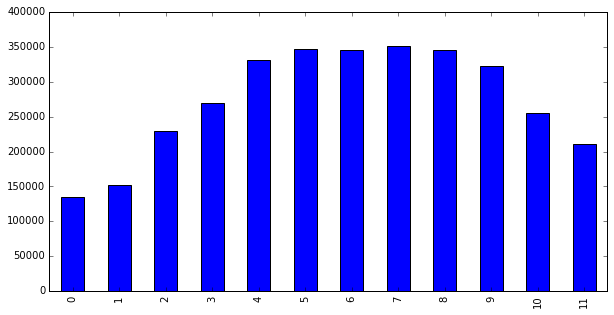

In [17]:
data_plot = data_small_df.groupby('mnth', as_index=False).agg('sum')[['mnth','cnt']]
data_plot
data_plot['cnt'].plot.bar(figsize=(10,5))


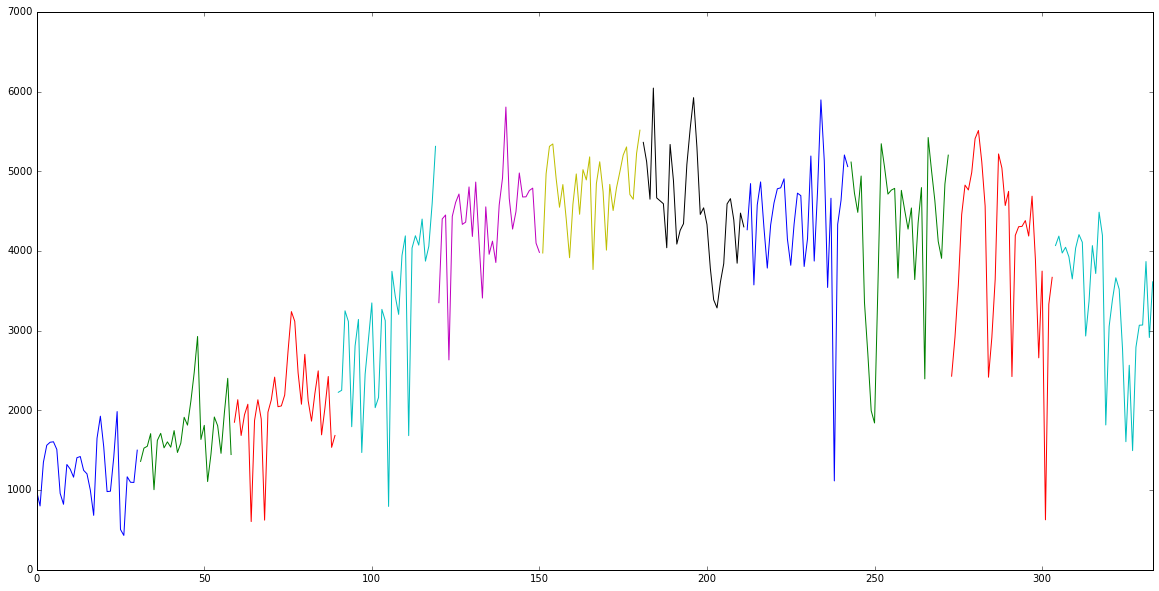

In [28]:
data_plot_2 = data_df[['Date_dt','cnt','mnth','yr']]
data_plot_2= data_plot_2[data_plot_2['yr']==0]

for x in range(1,12):
    data_plot_2[data_plot_2['mnth']==x]['cnt'].plot(figsize=(20,10))

In [7]:
scaler = MinMaxScaler()
data_small_df['cnt_Scaled'] = scaler.fit_transform(data_small_df[['cnt']])
data_small_df.head()

,Date_dt,cnt,mnth,cnt_Scaled
0,2011-01-01,985,1,0.110792
1,2011-01-02,801,1,0.089623
2,2011-01-03,1349,1,0.152669
3,2011-01-04,1562,1,0.177174
4,2011-01-05,1600,1,0.181546


# Traditional Embeddings

In [8]:
pd.get_dummies(data_small_df['mnth']).head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0


# Deep Encoding

In [9]:
data_small_df['mnth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [10]:
data_small_df['mnth'] = data_small_df['mnth']-1
data_small_df['mnth'] = data_small_df['mnth'].astype(int)

In [11]:
embedding_size = 3

model = models.Sequential()
model.add(Embedding(input_dim = 12, output_dim = embedding_size, input_length = 1, name="embedding"))
model.add(Flatten())
model.add(Dense(50, activation="relu"))
model.add(Dense(15, activation="relu"))
model.add(Dense(1))
model.compile(loss = "mse", optimizer = "adam", metrics=["accuracy"])
model.fit(x = data_small_df['mnth'].as_matrix(), y=data_small_df['cnt_Scaled'].as_matrix() , epochs = 50, batch_size = 4)


Epoch 1/50
731/731 [==============================] - 1s 1ms/step - loss: 0.0652 - acc: 0.0014
Epoch 2/50
731/731 [==============================] - 0s 455us/step - loss: 0.0321 - acc: 0.0014
Epoch 3/50
731/731 [==============================] - 0s 447us/step - loss: 0.0317 - acc: 0.0014
Epoch 4/50
731/731 [==============================] - 0s 469us/step - loss: 0.0316 - acc: 0.0014
Epoch 5/50
731/731 [==============================] - 0s 497us/step - loss: 0.0316 - acc: 0.0014
Epoch 6/50
731/731 [==============================] - 0s 453us/step - loss: 0.0313 - acc: 0.0014
Epoch 7/50
731/731 [==============================] - 0s 441us/step - loss: 0.0317 - acc: 0.0014
Epoch 8/50
731/731 [==============================] - 0s 452us/step - loss: 0.0321 - acc: 0.0014
Epoch 9/50
731/731 [==============================] - 0s 461us/step - loss: 0.0316 - acc: 0.0014
Epoch 10/50
731/731 [==============================] - 0s 502us/step - loss: 0.0313 - acc: 0.0014
Epoch 11/50
731/731 [==========

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1, 3)              36        
_________________________________________________________________
flatten_1 (Flatten)          (None, 3)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                200       
_________________________________________________________________
dense_2 (Dense)              (None, 15)                765       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 16        
Total params: 1,017
Trainable params: 1,017
Non-trainable params: 0
_________________________________________________________________


In [13]:
layer = model.get_layer('embedding')
output_embeddings = layer.get_weights()
output_embeddings

[array([[-0.1054516 ,  0.1995254 , -0.13693662],
        [-0.04004342,  0.09968416, -0.17684527],
        [-0.08975228,  0.01955761, -0.06635904],
        [-0.02937854, -0.02708675,  0.03999599],
        [ 0.09610422, -0.05861649,  0.02164031],
        [ 0.10633904, -0.09067253,  0.12091611],
        [ 0.08195948, -0.09492374,  0.08465529],
        [ 0.10861301, -0.10385017,  0.06210951],
        [ 0.09554981, -0.11841698,  0.10046335],
        [ 0.07633875, -0.05038586,  0.04002661],
        [-0.04496168,  0.01187145,  0.0394122 ],
        [-0.13827224,  0.05468575, -0.05286161]], dtype=float32)]

In [29]:
output_embeddings_df = pd.DataFrame(output_embeddings[0])
output_embeddings_df = output_embeddings_df.reset_index()
output_embeddings_df.columns = ['mnth', 'embedding_1', 'embedding_2', 'embedding_3']
output_embeddings_df

,mnth,embedding_1,embedding_2,embedding_3
0,0,-0.105452,0.199525,-0.136937
1,1,-0.040043,0.099684,-0.176845
2,2,-0.089752,0.019558,-0.066359
3,3,-0.029379,-0.027087,0.039996
4,4,0.096104,-0.058616,0.021640
5,5,0.106339,-0.090673,0.120916
6,6,0.081959,-0.094924,0.084655
7,7,0.108613,-0.103850,0.062110
8,8,0.095550,-0.118417,0.100463
9,9,0.076339,-0.050386,0.040027


# Vizualisation

In [15]:
output_embeddings_df.iloc[:,1:]

,embedding_0,embedding_1,embedding_2
0,-0.105452,0.199525,-0.136937
1,-0.040043,0.099684,-0.176845
2,-0.089752,0.019558,-0.066359
3,-0.029379,-0.027087,0.039996
4,0.096104,-0.058616,0.021640
5,0.106339,-0.090673,0.120916
6,0.081959,-0.094924,0.084655
7,0.108613,-0.103850,0.062110
8,0.095550,-0.118417,0.100463
9,0.076339,-0.050386,0.040027


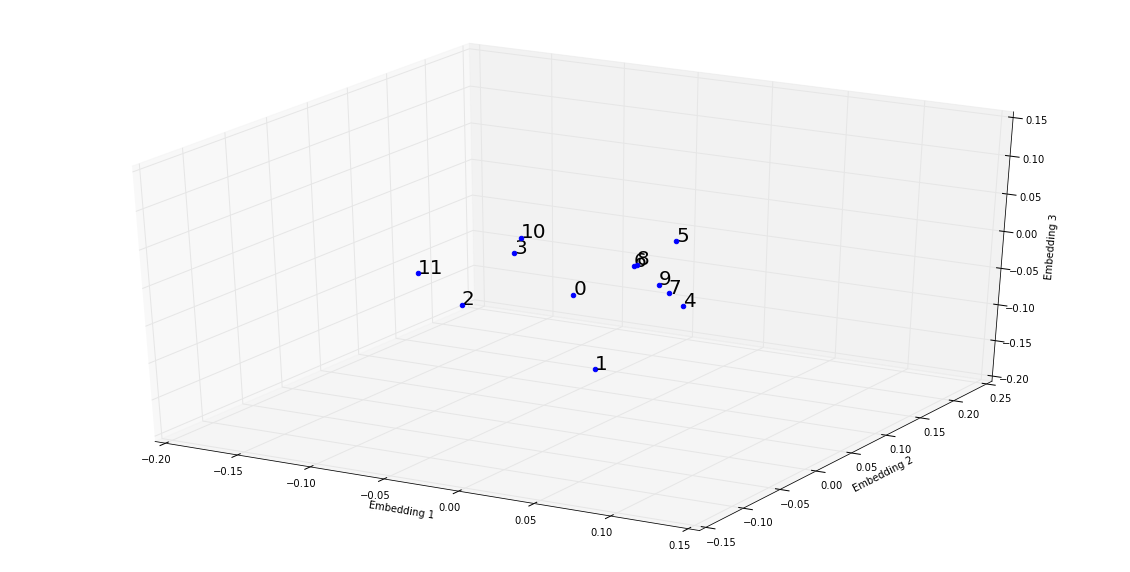

In [32]:
m = output_embeddings_df.iloc[:,1:].as_matrix()
labels = output_embeddings_df.iloc[:,0:1].as_matrix()
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

for i in range(len(labels)):
    ax.scatter(m[i,0],m[i,1],m[i,2], color='b')
    ax.text(m[i,0],m[i,1],m[i,2],'%s'%(str(labels[i][0])), size=20, zorder=1, color='k')

ax.set_xlabel('Embedding 1')  
ax.set_ylabel('Embedding 2')  
ax.set_zlabel('Embedding 3')  
plt.show()